The workflow combines workflows in build_database_05.ipynb and prediction_03.ipynb workflows to test our latest model (CaCO3) on the core PS75-056-1. This core only has CaCO3 as the bulk chemistry.

In [1]:
import numpy as np 
import pandas as pd
import glob
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Read and build spectral dataset
The core has the same data format as the usual one.

In [3]:
file_name = []
spe_all = []
depth_all = []
cps_all = []
core_all = []
s_depth_all = []

# only read the 10kV which having better signal to the light elements
spe_dir = glob.glob('data/PS75-056-1/Run 1 at  10kV/*.spe')

# make sure the order follows the depthes in filename
spe_dir.sort()

for spe in spe_dir:
    check_depth = spe.split()[3].split('_')[-1]

    # there are some inconsistencies in nameing...as usual
    # 5 and 6 digis means in mm
    if len(check_depth) >= 5:
        start_depth = int(check_depth)
    # 3 and 4 digit means in cm, needs to be multipled to be mm
    elif len(check_depth) >= 3:
        start_depth = int(check_depth) * 10

    file_name.append(spe.split('/')[-1])

    with open(spe, 'r') as f:
        content = []
        lines = f.readlines()
        for line in lines[49:]:
            content = np.hstack((content, line.split()))

        section_depth = int(lines[13][:-3])
        spe_all.append(content.astype(int))
        cps_all.append(int(lines[28]))
        core_all.append('PS75-056-1')
        s_depth_all.append(section_depth)
        depth_all.append(section_depth + start_depth)

In [4]:
spe_df = pd.DataFrame(spe_all, columns = [str(_) for _ in range(2048)])
spe_df['cps'] = cps_all
spe_df['core'] = core_all
spe_df['composite_depth_mm'] = depth_all
spe_df['section_depth_mm'] = s_depth_all
spe_df['filename'] = file_name

In [5]:
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,126814,PS75-056-1,5,5,PS75-056-1_0000 5.0mm 10s 10kV 150uA No-F...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,170569,PS75-056-1,10,10,PS75-056-1_0000 10.0mm 10s 10kV 150uA No-F...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,175200,PS75-056-1,15,15,PS75-056-1_0000 15.0mm 10s 10kV 150uA No-F...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,175607,PS75-056-1,20,20,PS75-056-1_0000 20.0mm 10s 10kV 150uA No-F...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,176768,PS75-056-1,25,25,PS75-056-1_0000 25.0mm 10s 10kV 150uA No-F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,80648,PS75-056-1,10190,980,PS75-056-1_0921 980.0mm 10s 10kV 150uA No-F...
2226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,82021,PS75-056-1,10195,985,PS75-056-1_0921 985.0mm 10s 10kV 150uA No-F...
2227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,79847,PS75-056-1,10200,990,PS75-056-1_0921 990.0mm 10s 10kV 150uA No-F...
2228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,73844,PS75-056-1,10205,995,PS75-056-1_0921 995.0mm 10s 10kV 150uA No-F...


In [6]:
spe_df[spe_df.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename


## Build composite_id

In [7]:
spe_df.composite_depth_mm.max()

10210

In [8]:
composite_id = []
for core, depth in zip(spe_df.core, spe_df.composite_depth_mm):
    composite_id.append('{}_{:05}'.format(core, depth))
    
spe_df['composite_id'] = composite_id
spe_df = spe_df.set_index('composite_id')

## Drop duplicates

In [9]:
len(spe_df.drop_duplicates('composite_id', keep = 'last'))

2230

There is no duplicates because the length is the same.

## Build section

In [11]:
section_all = []
# make sure the order follows the core and composite depth
spe_df.sort_values(by = 'composite_id', axis = 0, inplace = True)

# I assume every core scanned from section 0 so the first section in the core is marked as section 0
# the deeper the larger number
section = 0
X = spe_df['section_depth_mm']
for i in range(len(X)):
    section_all.append(section)
    try:
        # when section changes, the section depth should be rest to smaller number
        if X[i] > X[i + 1]:
            section += 1
    except IndexError:
        print('bottom of the core.')

spe_df['section'] = section_all

bottom of the core.


In [19]:
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename,section
composite_id,,,,,,,,,,,,,,,,,,,,,
PS75-056-1_00005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,126814,PS75-056-1,5,5,PS75-056-1_0000 5.0mm 10s 10kV 150uA No-F...,0
PS75-056-1_00010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,170569,PS75-056-1,10,10,PS75-056-1_0000 10.0mm 10s 10kV 150uA No-F...,0
PS75-056-1_00015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,175200,PS75-056-1,15,15,PS75-056-1_0000 15.0mm 10s 10kV 150uA No-F...,0
PS75-056-1_00020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,175607,PS75-056-1,20,20,PS75-056-1_0000 20.0mm 10s 10kV 150uA No-F...,0
PS75-056-1_00025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,176768,PS75-056-1,25,25,PS75-056-1_0000 25.0mm 10s 10kV 150uA No-F...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PS75-056-1_10190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,80648,PS75-056-1,10190,980,PS75-056-1_0921 980.0mm 10s 10kV 150uA No-F...,10
PS75-056-1_10195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,82021,PS75-056-1,10195,985,PS75-056-1_0921 985.0mm 10s 10kV 150uA No-F...,10
PS75-056-1_10200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,79847,PS75-056-1,10200,990,PS75-056-1_0921 990.0mm 10s 10kV 150uA No-F...,10


## Read bulk chemistry

In [30]:
bulk_df = pd.read_table('data/Bulk chem/PS75-56_bulkCaCO3 (%)', skiprows=1)
bulk_df['depth m'] = bulk_df['depth m'] * 1000
bulk_df.columns = ['mid_depth_mm', 'CaCO3%'] # modify headers to match previous bulk datasets
bulk_df['core'] = ['PS75-056-1' for _ in range(len(bulk_df))]
bulk_df = bulk_df[['CaCO3%', 'core', 'mid_depth_mm']]# modify orders to match previous bulk datasets
bulk_df

,CaCO3%,core,mid_depth_mm
0,78.870,PS75-056-1,10.0
1,77.889,PS75-056-1,50.0
2,75.332,PS75-056-1,150.0
3,76.673,PS75-056-1,250.0
4,73.165,PS75-056-1,350.0
...,...,...,...
98,24.091,PS75-056-1,9750.0
99,26.568,PS75-056-1,9850.0
100,28.045,PS75-056-1,9950.0
101,24.707,PS75-056-1,10050.0


In [31]:
bulk_df.isna().any()

CaCO3%          False
core            False
mid_depth_mm    False
dtype: bool

# Merge spe and bulk datasets

In [32]:
mask_c = spe_df.columns[:2048]  # only the channels
merge_df = pd.DataFrame()

for index, row in bulk_df.iterrows():
    mid = row['mid_depth_mm']
    
    # get the spe in 10 mm interval
    mask_r = (spe_df.composite_depth_mm >= (mid-5)) & (spe_df.composite_depth_mm <= (mid+5))
    merge_df = pd.concat(
        [merge_df, spe_df.loc[mask_r, mask_c].apply(np.mean, axis = 0).append(row)],
        axis = 1
    )
    
merge_df = merge_df.T.reset_index(drop = True)
merge_df

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,CaCO3%,core,mid_depth_mm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,78.87,PS75-056-1,10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,77.889,PS75-056-1,50
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75.332,PS75-056-1,150
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,76.673,PS75-056-1,250
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,73.165,PS75-056-1,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.091,PS75-056-1,9750
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26.568,PS75-056-1,9850
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,28.045,PS75-056-1,9950
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24.707,PS75-056-1,10050


### Check rows having nan in any column 

In [33]:
merge_df[merge_df.isnull().any(axis = 1)]

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,CaCO3%,core,mid_depth_mm


Good, no nan in the dataset.

## Export dataset
This dataset combines the merged datasets of core PS75-056-1 and only has CaCO3 measurements.

In [35]:
merge_df.to_csv('data/spe+bulk_PS75-056-1_{}.csv'.format(date))
bulk_df.to_csv('data/bulk_PS75-056-1_{}.csv'.format(date))
spe_df.to_csv('data/spe_PS75-056-1_{}.csv'.format(date))
print(date)

20210601


# Test the accuracy

In [10]:
#merge_df = pd.read_csv('data/spe+bulk_PS75-056-1_20210601.csv', index_col=0)
X = merge_df.iloc[:, :2048].values
X = X / X.sum(axis = 1, keepdims = True)

In [38]:
from joblib import load
m_caco3 = load('models/caco3_nmf+svr_model_20201216.joblib')

# Predict

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

y_caco3 = np.exp(m_caco3.predict(X))
print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(merge_df['CaCO3%'], y_caco3)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(merge_df['CaCO3%'], y_caco3)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(merge_df['CaCO3%'], y_caco3)))

Scores in the test set:
R2 = -0.560 .
The mean absolute error is 17.293 (%, concetration).
The max. residual error is 47.253 (%, concetration).


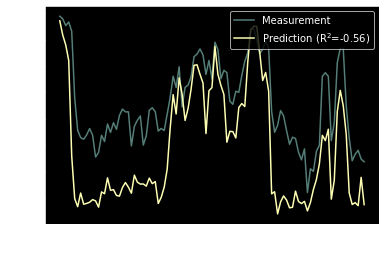

In [46]:
plt.plot(range(len(y_caco3)), merge_df['CaCO3%'], alpha=0.6, label='Measurement')
plt.plot(range(len(y_caco3)), y_caco3, label='Prediction (R$^2$={:.2f})'.format(r2_score(merge_df['CaCO3%'], y_caco3)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('CaCO$_3$ concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
plt.savefig('results/caco3_predictions_PS75-056-1_{}.png'.format(date))

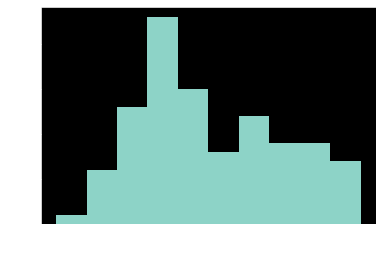

In [49]:
plt.hist(merge_df['CaCO3%'])
plt.xlabel('CaCO${_3}$ (wt%) ')
plt.ylabel('Count')
plt.savefig('results/caco3_hist_PS75-056-1_{}.png'.format(date))

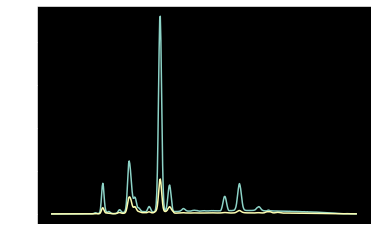

In [7]:
plt.plot(range(520), X.max(axis=0)[:520], label='Max.')
plt.plot(range(520), X.min(axis=0)[:520], label='Min.')

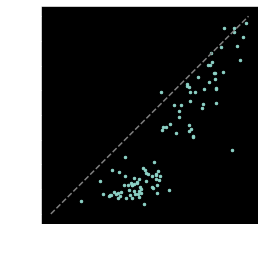

In [59]:
fig, ax = plt.subplots(1, 1)
ax.plot([0, 80], [0, 80], ls='--', c='gray')
ax.scatter(merge_df['CaCO3%'], y_caco3, s=6)
ax.set_aspect('equal')
ax.set_xlabel('Measurement (wt%) ')
ax.set_ylabel('Prediction (wt%) ')
fig.savefig('results/caco3_predictions_PS75-056-1_2_{}.png'.format(date))

# Draw spectrum

In [8]:
pre_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
pre_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split
X_p = pre_df.iloc[:, : -5].values
X_p = X_p / X_p.sum(axis = 1, keepdims = True)

SO264_core = pre_df.core.unique()[:-3]

s1_X_train, _ = train_test_split(X_p[pre_df.core.isin(SO264_core)], test_size = 0.2, shuffle = True, random_state = 24)
s2_ca_train, _ = train_test_split(X_p[pre_df.core.isin(['LV28-44-3', 'LV29-114-3'])], test_size = 0.2, shuffle = True, random_state = 24)

The sum of carbonate and TOC training data amounts fit to the histogram, respectively.

I don't have enough time to fine-tune a figure for all these spectra in different steps and analytes so I plot the figure of the 1st+2nd scale ups only for now.

20210603


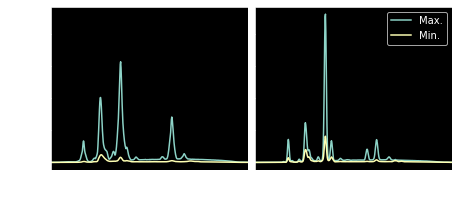

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(7.2, 3), sharex='row', sharey='row')

axes[0].plot(range(2048), np.vstack((s1_X_train, s2_ca_train)).max(axis=0), label='Max.')
axes[0].plot(range(2048), np.vstack((s1_X_train, s2_ca_train)).min(axis=0), label='Min.')
axes[0].set_xlim(0, 520)
axes[0].set_ylabel('Normalized intensity')
axes[0].set_xlabel('Channel, Training data')

axes[1].plot(range(2048), X.max(axis=0), label='Max.')
axes[1].plot(range(2048), X.min(axis=0), label='Min.')
axes[1].set_xlabel('Channel, PS75-056-1')
axes[1].legend()

fig.subplots_adjust(wspace=.04)
plt.savefig('results/spectra_comparison_1_{}.png'.format(date))
print(date)

20210603


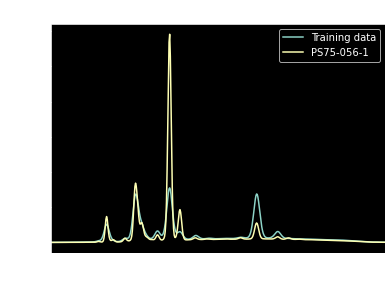

In [22]:
plt.plot(range(2048), np.vstack((s1_X_train, s2_ca_train)).mean(axis=0), label='Training data')
plt.plot(range(2048), X.mean(axis=0), label='PS75-056-1')
plt.xlim(0, 520)
plt.ylabel('Normalized intensity')
plt.xlabel('Channel')
plt.legend()
plt.suptitle('Averaged spectra')
plt.subplots_adjust(top=.92)
plt.savefig('results/spectra_comparison_2_{}.png'.format(date))
print(date)